# PART II:

# Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.


# Domain: Food and agriculture

# 1. Import required libraries and read the dataset.

In [1]:
import numpy as np
from numpy import mean
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Importing the data
data=pd.read_csv('honey_project_Part2.csv')

In [3]:
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
data


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


# shape of the data

In [5]:
data.shape

(626, 8)

# Print the information of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


# Summary statistics of the data

In [7]:
data.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


# Checking the data have the null value

In [8]:
data.isnull().value_counts()

state  numcol  yieldpercol  totalprod  stocks  priceperlb  prodvalue  year 
False  False   False        False      False   False       False      False    626
dtype: int64

# 3. Display the percentage distribution of the data in each year using the pie chart.


In [9]:
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


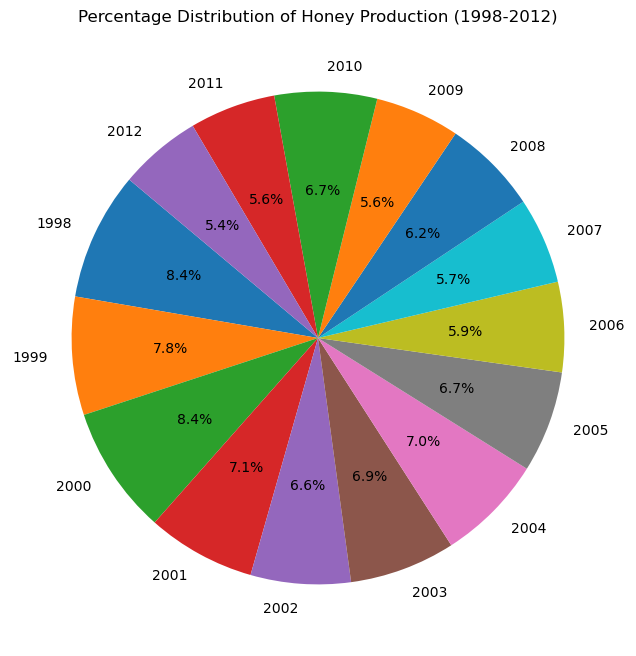

In [10]:


# Group the data by year and calculate the total production for each year
yearly_production = data.groupby('year')['totalprod'].sum()

# Calculate the percentage distribution
percentage_distribution = (yearly_production / yearly_production.sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_distribution, labels=yearly_production.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Honey Production (1998-2012)')
plt.show()


# 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


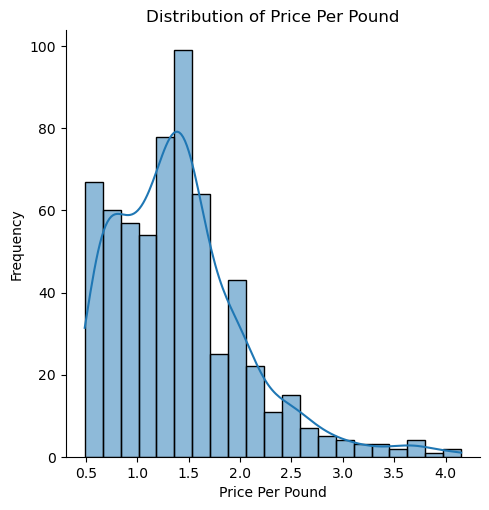

In [11]:
price_per_lb_data = data['priceperlb']

# Create a displot
sns.displot(price_per_lb_data, kde=True)
plt.title('Distribution of Price Per Pound')
plt.xlabel('Price Per Pound')
plt.ylabel('Frequency')

# Show the plot
plt.show()








# 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


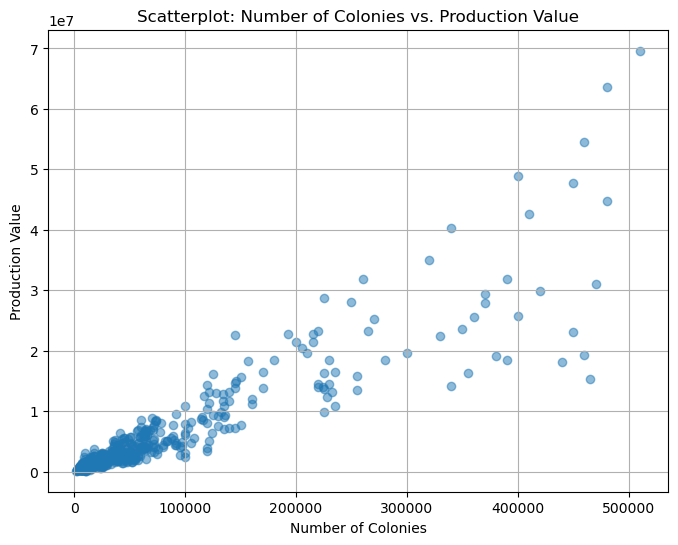

In [12]:

# Extract the 'numcol' and 'prodvalue' columns
num_colonies = data['numcol']
production_value = data['prodvalue']

# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(num_colonies, production_value, alpha=0.5)
plt.title('Scatterplot: Number of Colonies vs. Production Value')
plt.xlabel('Number of Colonies')
plt.ylabel('Production Value')
plt.grid(True)

# Show the plot
plt.show()


# Inference

Direction of Relationship: Observe the general direction of the data points. Are they mostly going up or down, or is there no clear trend?

Strength of Relationship: Consider how closely the data points cluster together. A tighter cluster indicates a stronger relationship, while a more scattered pattern suggests a weaker relationship.

Outliers: Look for any points that are far away from the main cluster. These are outliers and may have a disproportionate impact on the relationship.

Correlation: If the data points tend to follow a clear trend (upward or downward), this suggests a positive or negative correlation between the two variables. A horizontal trend indicates little to no correlation.

Overall Pattern: Summarize the overall pattern. For example, you might say, "As the number of colonies increases, there is a general increase in production value," if there's a positive correlation.

# 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.



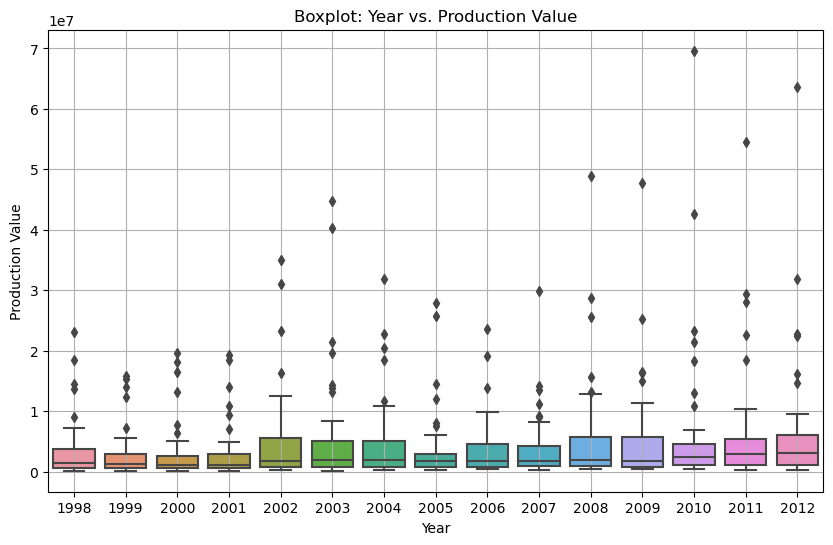

In [16]:


# Extract the 'year' and 'prodvalue' columns
years = data['year']
production_value = data['prodvalue']

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=years, y=production_value)
plt.title('Boxplot: Year vs. Production Value')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.grid(True)

# Show the plot
plt.show()


# Inference

Variation by Year: Observe how the boxplots for each year vary in terms of their center (median), spread (interquartile range), and the presence of outliers.

Central Tendency: Identify the median value for each year. The median is represented by the line inside the box. It gives you an idea of the typical production value for each year.

Spread: Look at the range of production values for each year, as indicated by the size of the boxes (interquartile range). Wider boxes suggest greater variability in production values for that year.

Outliers: Notice any individual points outside the "whiskers" of the boxplot. These are outliers and can indicate extreme or unusual values.

Trends Over Time: Check if there is a general trend in production values over the years. For example, are values increasing, decreasing, or staying relatively stable?

# 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

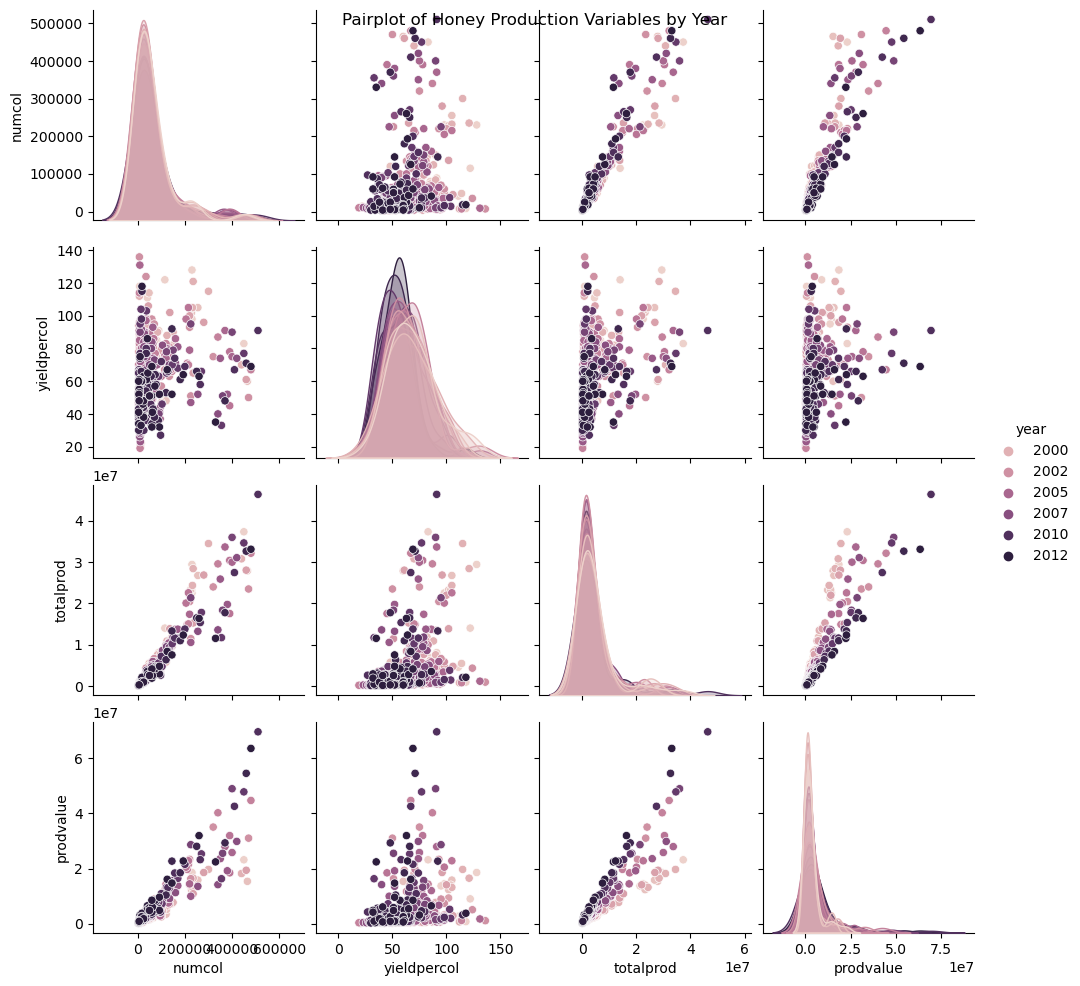

In [14]:


# Select the columns of interest
selected_columns = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
data_subset =data[selected_columns]

# Create a pairplot
sns.pairplot(data_subset, hue='year', markers="o", diag_kind="kde")
plt.suptitle("Pairplot of Honey Production Variables by Year")
plt.show()


# Inference

Diagonal Plots (Kernel Density Estimation - KDE): The diagonal plots show the distribution of each variable. Observe the shapes of these distributions to understand the data's underlying patterns. For example, you can see how 'numcol' or 'totalprod' is distributed for each year.

Scatterplots: The off-diagonal plots are scatterplots for pairs of variables. Each point represents a specific year, and the color distinguishes different years. Look at how the points are distributed to see if there are any apparent patterns or correlations between variables.

Correlations: Check for correlations between variables. If points in the scatterplots tend to follow a trend (either upward or downward), it suggests a correlation between those variables.

Outliers: Identify any data points that are far away from the main clusters. These may be outliers.

Yearly Changes: By using color to differentiate years, you can see how relationships between variables change over time.

# 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')


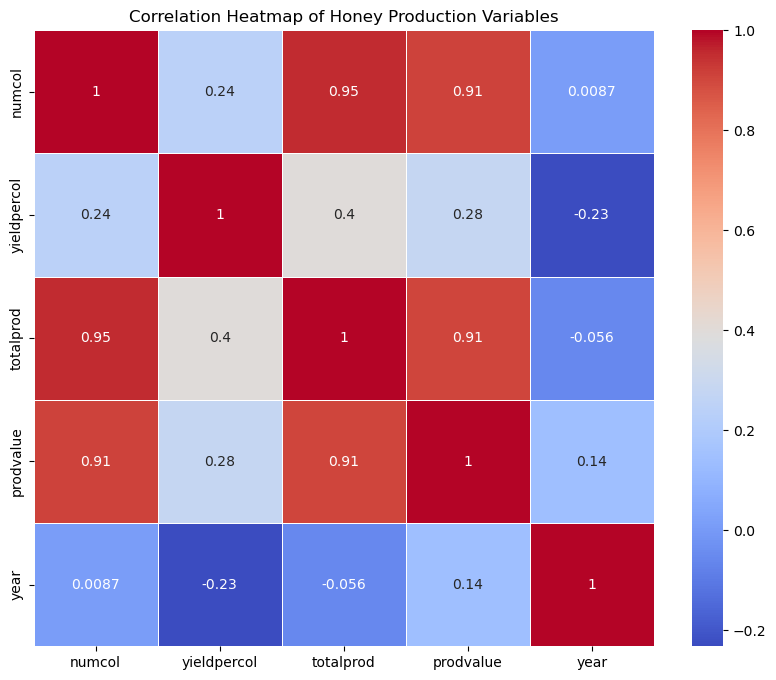

In [15]:


# Create a correlation matrix
correlation_matrix =data[selected_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of Honey Production Variables")
plt.show()